<h2 align='center'><a>1.Understanding the business problem</h2>

In [1]:
# Business Problem:

# One of the global banks would like to understand what factors driving credit card spend are.

# The bank want use these insights to calculate credit limit. In order to solve the problem, the bank
# conducted survey of 5000 customers and collected data.

# The objective of this case study is to understand what's driving the total spend (Primary Card +
# Secondary card). Given the factors, predict credit limit for the new applicants

In [2]:
# Required to detect the correct Dep and Independent variable by indepth study of variable.
## Then
# Convert the business problem into the mathematical problem.

#### <a>Importing the necessary library.

In [3]:
import pandas as pd 
import numpy as np 
import pandas_profiling

import seaborn as sns

import scipy.stats as stats
import sklearn as sk

import statsmodels.formula.api as sn
import scipy.stats as stats


from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices


import matplotlib.pyplot as plt
import statsmodels as sm
%matplotlib inline
plt.rcParams['figure.figsize'] = 6, 4
plt.rcParams['axes.grid'] = True


<h2 align='center'><a>2.Exploratory Data Analysis(EDA)</h2>

#### <a>Import the data

In [4]:
#.Importing the data. 
Banking = pd.read_excel( "D:\\Python\\Advance\\1. Predicting Credit Card Spend & Identifying Key Drivers\\Data Set.xlsx" )

In [5]:
Dic=pd.read_excel("D:\\Python\\Advance\\1. Predicting Credit Card Spend & Identifying Key Drivers\\Data Dictionary.xlsx")

#### <a>Making friendship with data after importing.

In [6]:
Banking=Banking.copy()
Banking.head(4)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0


In [7]:
Banking.shape ## Shape of the database.

(5000, 130)

In [8]:
B_missing=Banking.isnull().sum()[Banking.isnull().sum()>0].reset_index()## Missing value within the datasheet.
B_missing 

,index,0
0,townsize,2
1,lncreddebt,1
2,lnothdebt,1
3,commutetime,2
4,longten,3
5,lnlongten,3
6,lntollmon,2622
7,lntollten,2622
8,lnequipmon,3296
9,lnequipten,3296


In [9]:
B_missing.loc[B_missing[0]>1000] ## Missing values above thousand. 

,index,0
6,lntollmon,2622
7,lntollten,2622
8,lnequipmon,3296
9,lnequipten,3296
10,lncardmon,1419
12,lncardten,1422
13,lnwiremon,3656
14,lnwireten,3656


In [10]:
print(list((B_missing.loc[B_missing[0]>1000])['index'])) ##Missing value columns name in list.

['lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon', 'lncardten', 'lnwiremon', 'lnwireten']


In [11]:
## As the no. of rows is 5000 and some of the columns having high missing values i.e more than 1000 cell effected
## in a columns-
## Droping the columns list below-Attributes have more than 25% missing value.
#lnwireten	Log-wireless over tenure
#lnwiremon	Log-wireless last month
#lncardten	Log-calling card over tenure
#lncardmon	Log-calling card last month
#lnequipten	Log-equipment over tenure
#lnequipmon	Log-equipment last month
#lntollten	Log-toll free over tenure
#lntollmon	Log-toll free last month

Banking=Banking.drop(['lntollmon', 'lntollten', 'lnequipmon', 'lnequipten', 'lncardmon','lncardten', 'lnwiremon', 'lnwireten'],axis=1)

In [12]:
Banking.shape #Shape of the database.

(5000, 122)

In [13]:
##Droping the first column i.e-custid---Showing the high cardinality---
##Cardinality(uniqueness of data values contained in a column)

Banking=Banking.drop(['custid'],axis=1)  ##Drop the custid

In [14]:
Banking.shape #Shape of the database.

(5000, 121)

In [15]:
Banking=Banking.drop(['birthmonth'],axis=1) ##Not adding any value addition to the dependent variable.

In [16]:
Banking.shape #Shape of the database.

(5000, 120)

#### Creating Dependent Y column(total spend (Primary Card + Secondary card)

In [17]:
#To create Y we need to sumup cardspent(first card spent amount) and card2spent(Second card spent amount)
Banking['Total_spend'] = Banking['cardspent'] + Banking['card2spent']

In [18]:
Banking=Banking.drop(['cardspent','card2spent'],axis=1) ##Droping the cardspent and card2spent column.

In [19]:
Banking.shape #Shape of the database.

(5000, 119)

In [20]:
Banking.head(10)

,region,townsize,gender,age,agecat,ed,edcat,jobcat,union,employ,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,Total_spend
0,1,2.0,1,20,2,15,3,1,1,0,...,0,0,1,1,0,0,0,1,0,149.46
1,5,5.0,0,22,2,17,4,2,0,0,...,1,1,1,1,1,1,0,0,0,77.54
2,3,4.0,1,67,6,14,2,2,0,16,...,0,0,0,0,0,1,0,0,0,359.97
3,4,3.0,0,23,2,16,3,2,0,0,...,0,1,1,1,0,1,1,0,0,359.41
4,2,2.0,0,26,3,16,3,2,0,1,...,0,1,0,1,0,0,0,1,0,507.83
5,4,4.0,0,64,5,17,4,3,0,22,...,1,0,0,0,0,0,0,1,0,228.27
6,2,5.0,1,52,5,14,2,1,0,10,...,0,1,1,0,0,0,0,0,0,952.46
7,3,4.0,1,44,4,16,3,1,0,11,...,0,0,0,0,0,1,0,0,0,1304.80
8,2,3.0,1,66,6,12,2,1,0,15,...,0,0,0,0,0,0,1,0,0,467.83
9,2,2.0,0,47,4,11,1,6,0,19,...,0,0,0,0,0,0,0,0,0,310.81


#### Categorical Variable Name-

In [21]:
Dic.head() #from Dic get the categorical data.

,Numeric Variable,Label,Unnamed: 2,Categorical Variable,Unnamed: 4,Label.1
0,custid,Customer ID,NaN,region,1,Zone 1
1,region,Geographic indicator,NaN,NaN,2,Zone 2
2,townsize,Size of hometown,NaN,NaN,3,Zone 3
3,gender,Gender,NaN,NaN,4,Zone 4
4,age,Age in years,NaN,NaN,5,Zone 5


In [22]:
##Categorical Variable Name-

print(list(Dic.loc[Dic['Categorical Variable'].isnull()==False]['Categorical Variable']))

['region', 'townsize', 'gender', 'agecat', 'birthmonth', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']


In [23]:
print(list(Banking.columns))

['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'longten

#### Categorical attributes-

In [24]:
## Changing the categorical variables in the object form.
Banking[['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 
        'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 
        'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 
        'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 
        'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 
        'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 
        'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 
        'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 
        'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 
        'response_03']]=Banking[['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 
                               'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 
                               'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 
                               'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 
                               'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 
                               'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 
                               'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 
                               'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 
                               'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 
                               'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod',
                               'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']].astype('object')

In [25]:
Banking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 119 entries, region to Total_spend
dtypes: float64(21), int64(15), object(83)
memory usage: 3.0+ MB


#### <a>Creating Data audit Report

#### create UDFs

In [26]:
# Use a general function that returns multiple values-

# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                        x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [27]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [28]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode().iloc[0])
    return x

In [29]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = col_name, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

#### <a>Data Inspection

In [30]:
# seperate categorical and continuous variables
Banking_conti_vars = Banking.loc[:, (Banking.dtypes == 'float64') | (Banking.dtypes == 'int64')]
Banking_cat_vars = Banking.loc[:, (Banking.dtypes == 'object')]

In [31]:
#checking P1 & Min(Outliers),P99 & Max(Outliers),Mean Median,NMISS(for missing values).

Banking_conti_vars.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
age,5000.0,0.0,235128.00,47.03,47.00,17.77,315.78,18.00,18.00,20.00,23.00,31.00,47.00,62.00,72.00,76.00,79.00,79.00
ed,5000.0,0.0,72715.00,14.54,14.00,3.28,10.77,6.00,8.00,9.00,10.00,12.00,14.00,17.00,19.00,20.00,21.00,23.00
income,5000.0,0.0,273798.00,54.76,38.00,55.38,3066.67,9.00,9.00,13.00,16.00,24.00,38.00,67.00,109.10,147.00,272.01,1073.00
lninc,5000.0,0.0,18499.55,3.70,3.64,0.75,0.56,2.20,2.20,2.56,2.77,3.18,3.64,4.20,4.69,4.99,5.61,6.98
debtinc,5000.0,0.0,49770.80,9.95,8.80,6.40,40.96,0.00,0.70,1.90,2.80,5.10,8.80,13.60,18.60,22.20,29.20,43.10
creddebt,5000.0,0.0,9286.63,1.86,0.93,3.42,11.67,0.00,0.03,0.10,0.18,0.39,0.93,2.06,4.30,6.37,14.28,109.07
lncreddebt,4999.0,1.0,-652.14,-0.13,-0.08,1.27,1.62,-6.60,-3.40,-2.29,-1.74,-0.95,-0.08,0.72,1.46,1.85,2.66,4.69
othdebt,5000.0,0.0,18272.30,3.65,2.10,5.40,29.11,0.00,0.11,0.29,0.46,0.98,2.10,4.31,8.06,11.82,24.06,141.46
lnothdebt,4999.0,1.0,3483.88,0.70,0.74,1.13,1.27,-4.09,-2.17,-1.24,-0.78,-0.02,0.74,1.46,2.09,2.47,3.18,4.95
spoused,5000.0,0.0,30564.00,6.11,-1.00,7.74,59.96,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00,14.00,16.00,18.00,20.00,24.00


In [32]:
#checking Mode,Freq,NMISS,Percent,Count.

Banking_cat_vars.apply(categorical_var_summary).T.round(2)

,N,NMISS,MODE,FREQ,PERCENT
region,5000.0,0.0,5.0,1027.0,20.54
townsize,4998.0,2.0,1.0,1436.0,28.73
gender,5000.0,0.0,1.0,2518.0,50.36
agecat,5000.0,0.0,4.0,1222.0,24.44
edcat,5000.0,0.0,2.0,1567.0,31.34
...,...,...,...,...,...
ownfax,5000.0,0.0,0.0,4106.0,82.12
news,5000.0,0.0,0.0,2637.0,52.74
response_01,5000.0,0.0,0.0,4582.0,91.64
response_02,5000.0,0.0,0.0,4351.0,87.02


<h1 align='center'> <a>3.Treatment of Data</h1>

#### <a>Outlier Treatment

In [33]:
Banking_conti_vars= Banking_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), upper = x.dropna().quantile(0.99)))
#x.dropna()--not take the null value-only work on the outlier 

#### <a>Missing Value Treatment

In [34]:
## Banking=Banking_conti_vars ,Banking_cat_vars
Banking_conti_vars= Banking_conti_vars.apply(missing_imputation)
Banking_cat_vars= Banking_cat_vars.apply(missing_imputation)

In [35]:
## Again check missing values has been treated or not-

print ("Missing values in numerical data :  ", Banking_conti_vars.isnull().sum().values.sum())
print ("Missing values in categorical data :  ", Banking_cat_vars.isnull().sum().values.sum())

Missing values in numerical data :   0
Missing values in categorical data :   0


#### <a>Dummy Variables-

In [36]:
# Steps to be followed to create dummy variables:
# use pd.get_dummies() method to create dummy varaibles for each value inside the variable
# drop any one variable from the dummy variables to avoid multicolinearity
# concat the dummy data with the original dataset
# drop the variable from which dummy variable has been created

In [37]:
print(Banking_cat_vars.columns.tolist())

['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']


In [38]:
## Changing the categorical variables in the object form.
Banking_cat_vars[['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 
        'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 'address', 'addresscat', 
        'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutecar', 
        'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 
        'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 
        'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 
        'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 'wireless', 
        'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'owntv', 'ownvcr', 
        'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news', 'response_01', 'response_02', 
        'response_03']]=Banking_cat_vars[['region', 'townsize', 'gender', 'agecat', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 
                               'retire', 'inccat', 'default', 'jobsat', 'marital', 'spousedcat', 'homeown', 'hometype', 
                               'address', 'addresscat', 'cars', 'carown', 'cartype', 'carcatvalue', 'carbought', 'carbuy', 
                               'commute', 'commutecat', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 
                               'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 
                               'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 
                               'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 
                               'card2tenure', 'card2tenurecat', 'active', 'bfast', 'churn', 'tollfree', 'equip', 'callcard', 
                               'wireless', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 
                               'confer', 'ebill', 'owntv', 'ownvcr', 'owndvd', 'owncd', 'ownpda', 'ownpc', 'ownipod',
                               'owngame', 'ownfax', 'news', 'response_01', 'response_02', 'response_03']].astype('category')

In [39]:
df=pd.get_dummies(Banking_cat_vars,drop_first=True) #Making dummies.

In [40]:
df.head(3)

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [41]:
Banking_New=pd.concat([df,Banking_conti_vars],axis=1) #Join the dummy.

In [42]:
Banking_New.head(3)

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,Total_spend
0,0,0,0,0,1,0,0,0,1,0,...,29.0,161.05,29.50,126.1,14.25,60.0,0.00,0.00,13,149.46
1,0,0,0,1,0,0,0,1,0,0,...,0.0,0.00,54.85,1975.0,16.00,610.0,45.65,1683.55,18,77.54
2,0,1,0,0,0,0,1,0,1,0,...,0.0,0.00,0.00,0.0,23.00,1410.0,0.00,0.00,21,359.97


In [43]:
Banking_New.shape

(5000, 381)

In [44]:
Banking_New

,region_2,region_3,region_4,region_5,townsize_2.0,townsize_3.0,townsize_4.0,townsize_5.0,gender_1,agecat_3,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,Total_spend
0,0,0,0,0,1,0,0,0,1,0,...,29.0,161.05,29.50,126.10,14.25,60.0,0.00,0.00,13,149.46
1,0,0,0,1,0,0,0,1,0,0,...,0.0,0.00,54.85,1975.00,16.00,610.0,45.65,1683.55,18,77.54
2,0,1,0,0,0,0,1,0,1,0,...,0.0,0.00,0.00,0.00,23.00,1410.0,0.00,0.00,21,359.97
3,0,0,1,0,0,1,0,0,0,0,...,0.0,0.00,0.00,0.00,21.00,685.0,0.00,0.00,26,359.41
4,1,0,0,0,1,0,0,0,0,1,...,16.5,387.70,0.00,0.00,17.25,360.0,19.05,410.80,27,507.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,1,0,0,0,0,0,...,0.0,0.00,0.00,0.00,21.75,1565.0,0.00,0.00,19,1425.67
4996,0,1,0,0,0,1,0,0,0,0,...,36.5,1157.20,0.00,0.00,26.25,800.0,27.90,757.35,14,366.35
4997,0,0,1,0,0,0,0,1,0,0,...,44.0,3322.50,0.00,0.00,15.25,1070.0,0.00,0.00,16,1527.75
4998,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,29.55,1032.85,9.50,345.0,0.00,0.00,24,752.95


In [45]:
## Some of the column rename for further process.
Banking_New=Banking_New.rename(columns={'townsize_2.0':'townsize_2',
       'townsize_3.0':'townsize_3', 'townsize_4.0':'townsize_4', 'townsize_5.0':'townsize_5'})

<h1 align='center'> <a>4.Preparing the Data</h1>

#### <a>Correlation Table

In [46]:
cor=Banking_New.corr()

In [47]:
cor

,region_2,region_3,region_4,region_5,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_3,...,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,Total_spend
region_2,1.000000,-0.249686,-0.243911,-0.253417,0.026397,0.013659,-0.021990,-0.119599,0.005929,0.000383,...,-0.015632,-0.018955,-0.018320,-0.029052,-0.007250,-0.007955,-0.016565,-0.020398,-0.014236,-0.009643
region_3,-0.249686,1.000000,-0.245134,-0.254688,0.027941,0.045435,-0.003862,-0.043989,0.000888,-0.005393,...,-0.004888,0.002994,0.002056,-0.008041,0.018603,0.010913,0.000920,-0.009552,-0.020927,0.012635
region_4,-0.243911,-0.245134,1.000000,-0.248798,-0.004323,0.029930,0.070473,0.020004,-0.017708,-0.012601,...,0.012103,0.014188,0.021887,0.022502,-0.021236,-0.016592,0.025123,0.021297,0.022931,0.004828
region_5,-0.253417,-0.254688,-0.248798,1.000000,-0.084239,-0.001667,0.072214,0.302174,-0.000195,0.016257,...,0.007857,-0.001321,0.012973,0.009729,0.026872,0.029734,0.013174,0.014727,0.002658,0.030141
townsize_2,0.026397,0.027941,-0.004323,-0.084239,1.000000,-0.242412,-0.234210,-0.216326,-0.000759,0.006193,...,0.018399,0.016181,0.021572,0.010051,-0.016056,-0.012476,0.009453,-0.001488,-0.010528,0.013887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cardten,-0.007955,0.010913,-0.016592,0.029734,-0.012476,-0.005130,-0.001476,-0.009163,-0.018587,-0.218742,...,0.260251,0.430466,-0.010808,0.205690,0.848393,1.000000,0.119097,0.267352,0.010628,0.048372
wiremon,-0.016565,0.000920,0.025123,0.013174,0.009453,0.010395,-0.004918,0.000271,-0.017112,0.029241,...,0.466909,0.380052,0.580154,0.511777,0.218523,0.119097,1.000000,0.877646,0.005340,0.085917
wireten,-0.020398,-0.009552,0.021297,0.014727,-0.001488,0.003514,-0.014171,0.002793,-0.012748,-0.053073,...,0.463667,0.516924,0.464939,0.590291,0.233520,0.267352,0.877646,1.000000,0.006765,0.100014
hourstv,-0.014236,-0.020927,0.022931,0.002658,-0.010528,0.019232,-0.031622,0.015981,-0.004984,0.044727,...,0.017787,0.019978,0.013359,0.021843,0.013073,0.010628,0.005340,0.006765,1.000000,0.031057


In [48]:
cor['Total_spend'][abs(cor['Total_spend'])>0.5]  ##Correlation Above 0.5.

Total_spend    1.0
Name: Total_spend, dtype: float64

In [49]:
##There are not a single variable that is highly correlated(more than 0.5) to y. 

In [50]:
cor['Total_spend'][abs(cor['Total_spend'])>0.05]  ##Relation of y with x.

gender_1      -0.077512
agecat_4       0.059555
agecat_5       0.124418
agecat_6      -0.078339
edcat_4        0.054792
                 ...   
equipmon       0.071432
equipten       0.088136
wiremon        0.085917
wireten        0.100014
Total_spend    1.000000
Name: Total_spend, Length: 75, dtype: float64

In [51]:
New_cor=cor.unstack().reset_index()
New_cor.columns

Index(['level_0', 'level_1', 0], dtype='object')

In [52]:
New_cor.head(5)

,level_0,level_1,0
0,region_2,region_2,1.000000
1,region_2,region_3,-0.249686
2,region_2,region_4,-0.243911
3,region_2,region_5,-0.253417
4,region_2,townsize_2,0.026397


In [53]:
New_cor=New_cor.rename(columns={0:'cor_'})

In [54]:
New_cor.head(5)

,level_0,level_1,cor_
0,region_2,region_2,1.000000
1,region_2,region_3,-0.249686
2,region_2,region_4,-0.243911
3,region_2,region_5,-0.253417
4,region_2,townsize_2,0.026397


In [55]:
New_cor.loc[(abs(New_cor.cor_)>0.6) & (New_cor.level_0!=New_cor.level_1)] ## Correlation above 0.06 and -0.06.

,level_0,level_1,cor_
4650,agecat_6,retire_1,0.642980
4917,agecat_6,age,0.725136
29730,retire_1,agecat_6,0.642980
31589,inccat_5,income,0.788056
31606,inccat_5,carvalue,0.651687
...,...,...,...
143958,wiremon,voice_1,0.646374
143959,wiremon,pager_1,0.680047
144015,wiremon,wireten,0.877646
144337,wireten,wireless_1,0.727113


In [56]:
## Highly correlated x-x variable.Multicolinearity  is present.
print(New_cor.loc[(abs(New_cor.cor_)>0.6) & (New_cor.level_0!=New_cor.level_1)].level_0.tolist())

['agecat_6', 'agecat_6', 'retire_1', 'inccat_5', 'inccat_5', 'marital_1', 'marital_1', 'homeown_1', 'hometype_2', 'addresscat_5', 'carown_0', 'carown_1', 'cartype_0', 'cartype_1', 'carcatvalue_1', 'carcatvalue_3', 'carcatvalue_3', 'carcatvalue_3', 'carbought_0', 'carbought_1', 'commute_3', 'commute_4', 'commute_8', 'commute_10', 'commutecat_2', 'commutecat_3', 'commutecat_4', 'commutecat_5', 'cardtenure_1', 'cardtenure_40', 'cardtenurecat_2', 'cardtenurecat_5', 'cardtenurecat_5', 'cardtenurecat_5', 'cardtenurecat_5', 'cardtenurecat_5', 'card2tenure_1', 'card2tenure_30', 'card2tenurecat_2', 'card2tenurecat_5', 'card2tenurecat_5', 'card2tenurecat_5', 'card2tenurecat_5', 'card2tenurecat_5', 'card2tenurecat_5', 'card2tenurecat_5', 'tollfree_1', 'tollfree_1', 'tollfree_1', 'tollfree_1', 'tollfree_1', 'tollfree_1', 'equip_1', 'equip_1', 'callcard_1', 'wireless_1', 'wireless_1', 'wireless_1', 'wireless_1', 'voice_1', 'voice_1', 'pager_1', 'pager_1', 'callid_1', 'callid_1', 'callid_1', 'callid

In [57]:
print(list(Banking.columns))

['region', 'townsize', 'gender', 'age', 'agecat', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat', 'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat', 'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype', 'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue', 'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat', 'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool', 'commutebus', 'commuterail', 'commutepublic', 'commutebike', 'commutewalk', 'commutenonmotor', 'telecommute', 'reason', 'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype', 'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2', 'card2type', 'card2benefit', 'card2fee', 'card2tenure', 'card2tenurecat', 'active', 'bfast', 'tenure', 'churn', 'longmon', 'lnlongmon', 'longten

#### Checking linearlity of data:

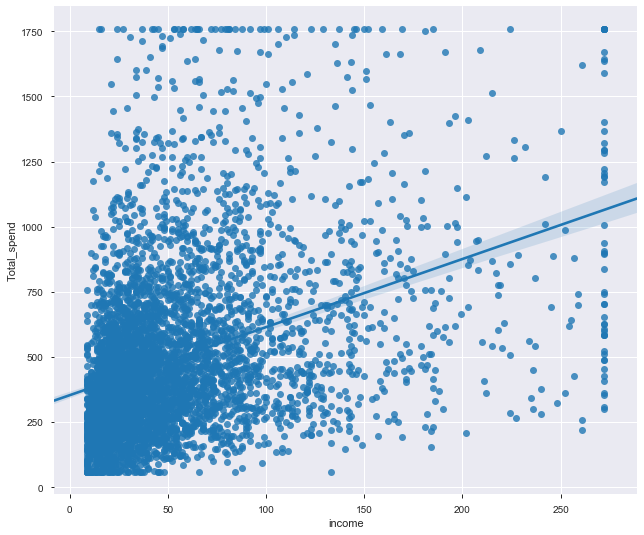

In [58]:
# Seaborn scatter plot with regression line
# aspect=1.5, scatter_kws={'alpha':0.2}) - You can choose this option too.

s=sns.lmplot(x='income', y='Total_spend', data=Banking_New)
s.fig.set_figwidth(10)
s.fig.set_figheight(8)

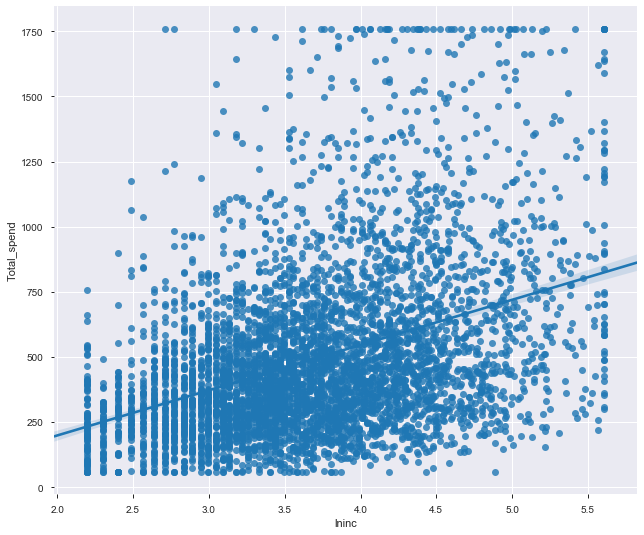

In [59]:
# Seaborn scatter plot with regression line
s=sns.lmplot(x='lninc', y='Total_spend', data=Banking_New)
s.fig.set_figwidth(10)
s.fig.set_figheight(8)

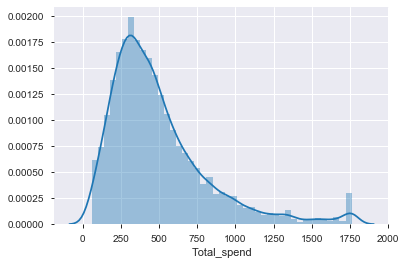

In [60]:
## 'Y' should be normal.
sns.distplot(Banking_New.Total_spend)

In [61]:
#### Now as we can see distribution is right skewed so we need to take log and then plot the graph.

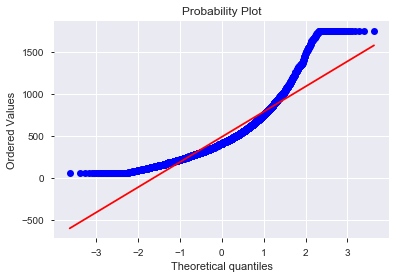

In [62]:
## Probability vs ordered values-
from scipy import stats
import pylab

stats.probplot(Banking_New.Total_spend, dist="norm", plot=pylab )
pylab.show()

In [63]:
Banking_New['Log_Total_spend']=np.log(Banking_New.Total_spend)

In [64]:
###Using the log transform. 

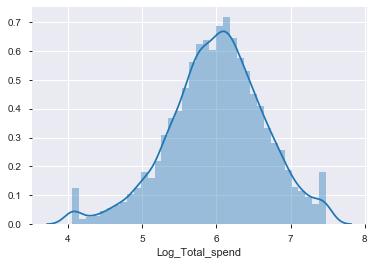

In [65]:
sns.distplot(Banking_New.Log_Total_spend)

In [66]:
##Now as we can see that distribution is normal now.

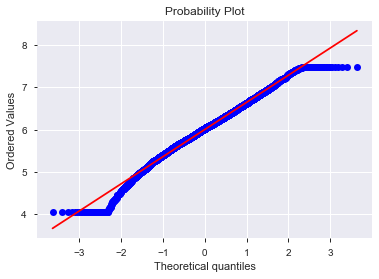

In [67]:
stats.probplot(Banking_New.Log_Total_spend, dist="norm", plot=pylab )
pylab.show()

In [68]:
##'Y' should not have any missing values.

Banking_New.Total_spend.isnull().sum()

0

In [69]:
Banking_New.shape

(5000, 382)

In [70]:
##Rename the columns for further process 
Banking_New=Banking_New.rename(columns={'townsize_2.0':'townsize_2',
       'townsize_3.0':'townsize_3', 'townsize_4.0':'townsize_4', 'townsize_5.0':'townsize_5'})

In [71]:
### All the features-
feature_column=Banking_New.iloc[:,range(0,380)]
feature_column

,region_2,region_3,region_4,region_5,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_3,...,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv
0,0,0,0,0,1,0,0,0,1,0,...,3.538057,29.0,161.05,29.50,126.10,14.25,60.0,0.00,0.00,13
1,0,0,0,1,0,0,0,1,0,0,...,5.800909,0.0,0.00,54.85,1975.00,16.00,610.0,45.65,1683.55,18
2,0,1,0,0,0,0,1,0,1,0,...,7.527444,0.0,0.00,0.00,0.00,23.00,1410.0,0.00,0.00,21
3,0,0,1,0,0,1,0,0,0,0,...,5.295564,0.0,0.00,0.00,0.00,21.00,685.0,0.00,0.00,26
4,1,0,0,0,1,0,0,0,0,1,...,4.305416,16.5,387.70,0.00,0.00,17.25,360.0,19.05,410.80,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,1,0,0,0,0,0,...,7.785679,0.0,0.00,0.00,0.00,21.75,1565.0,0.00,0.00,19
4996,0,1,0,0,0,1,0,0,0,0,...,5.666427,36.5,1157.20,0.00,0.00,26.25,800.0,27.90,757.35,14
4997,0,0,1,0,0,0,0,1,0,0,...,7.654088,44.0,3322.50,0.00,0.00,15.25,1070.0,0.00,0.00,16
4998,0,0,0,0,0,0,0,0,0,0,...,5.644386,0.0,0.00,29.55,1032.85,9.50,345.0,0.00,0.00,24


In [72]:
Banking_New.corr()['Log_Total_spend'][abs(Banking_New.corr()['Log_Total_spend'])>0].reset_index()

,index,Log_Total_spend
0,region_2,-0.003301
1,region_3,-0.001571
2,region_4,0.009329
3,region_5,0.029256
4,townsize_2,0.009117
...,...,...
377,wiremon,0.087177
378,wireten,0.097513
379,hourstv,0.044616
380,Total_spend,0.909423


In [73]:
print(Banking_New.corr()['Log_Total_spend'][abs(Banking_New.corr()['Log_Total_spend'])>0].reset_index()['index'].tolist())

['region_2', 'region_3', 'region_4', 'region_5', 'townsize_2', 'townsize_3', 'townsize_4', 'townsize_5', 'gender_1', 'agecat_3', 'agecat_4', 'agecat_5', 'agecat_6', 'edcat_2', 'edcat_3', 'edcat_4', 'edcat_5', 'jobcat_2', 'jobcat_3', 'jobcat_4', 'jobcat_5', 'jobcat_6', 'union_1', 'employ_1', 'employ_2', 'employ_3', 'employ_4', 'employ_5', 'employ_6', 'employ_7', 'employ_8', 'employ_9', 'employ_10', 'employ_11', 'employ_12', 'employ_13', 'employ_14', 'employ_15', 'employ_16', 'employ_17', 'employ_18', 'employ_19', 'employ_20', 'employ_21', 'employ_22', 'employ_23', 'employ_24', 'employ_25', 'employ_26', 'employ_27', 'employ_28', 'employ_29', 'employ_30', 'employ_31', 'employ_32', 'employ_33', 'employ_34', 'employ_35', 'employ_36', 'employ_37', 'employ_38', 'employ_39', 'employ_40', 'employ_41', 'employ_42', 'employ_43', 'employ_44', 'employ_45', 'employ_46', 'employ_47', 'employ_48', 'employ_49', 'employ_51', 'employ_52', 'empcat_2', 'empcat_3', 'empcat_4', 'empcat_5', 'retire_1', 'incca

In [74]:
## Feature selection through STEPAIC method-Using both forward and backward both.
# ['card2_2','card2_3','card2_4','card2_5','card_2','card_3','card_4','card_5'
#                ,'gender_1','lninc','reason_2','bfast_2','address_32','card2benefit_3']

In [75]:
# Selected feature columns-
New_Selection=['card2_2','card2_3','card2_4','card2_5','card_2','card_3','card_4','card_5'
              ,'gender_1','lninc','reason_2','bfast_2','address_32','card2benefit_3']

New_Selection.append('Log_Total_spend')

N_rf=Banking_New[New_Selection]

N_rf.head()

,card2_2,card2_3,card2_4,card2_5,card_2,card_3,card_4,card_5,gender_1,lninc,reason_2,bfast_2,address_32,card2benefit_3,Log_Total_spend
0,0,0,0,1,0,1,0,0,1,3.433987,0,0,0,0,5.007029
1,0,0,1,0,1,0,0,0,0,2.708050,0,0,0,1,4.350794
2,0,0,1,0,1,0,0,0,1,3.555348,1,0,0,1,5.886021
3,0,1,0,0,1,0,0,0,0,2.995732,0,0,0,0,5.884464
4,0,0,0,0,0,0,1,0,0,3.135494,0,0,0,0,6.230147


In [76]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(N_rf,test_size=0.20,random_state=42)

In [77]:
### Model making wih OLS method.
import statsmodels.formula.api as smf

stats="+".join(N_rf.columns.difference(['Log_Total_spend']))
'Log_Total_spend ~' + stats

'Log_Total_spend ~address_32+bfast_2+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+gender_1+lninc+reason_2'

In [78]:
lm1 = smf.ols('''Log_Total_spend ~address_32+bfast_2+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+gender_1+lninc+reason_2''', train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Total_spend   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     151.3
Date:                Mon, 02 Mar 2020   Prob (F-statistic):               0.00
Time:                        12:24:59   Log-Likelihood:                -3038.2
No. Observations:                4000   AIC:                             6106.
Df Residuals:                    3985   BIC:                             6201.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6395      0.054    103.

In [79]:
### On the tes file.
lm2 = smf.ols('''Log_Total_spend ~address_32+bfast_2+card2_2+card2_3+card2_4+card2_5+card2benefit_3+card_2+card_3+card_4+card_5+gender_1+lninc+reason_2''', test).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Log_Total_spend   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     34.08
Date:                Mon, 02 Mar 2020   Prob (F-statistic):           8.54e-75
Time:                        12:25:00   Log-Likelihood:                -812.16
No. Observations:                1000   AIC:                             1654.
Df Residuals:                     985   BIC:                             1728.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.5704      0.117     47.

In [80]:
lm1.pvalues[(lm1.pvalues>0.05)].sort_values(ascending=False)

Series([], dtype: float64)

In [81]:
N_rf.shape

(5000, 15)

#### <a>Variable Inflation factor

In [82]:
%%capture
#gather features
Features_ = "+".join(N_rf.columns.difference(['Log_Total_spend']))

# get y and X dataframes based on this regression:
a, b = dmatrices('Log_Total_spend ~' + Features_, N_rf, return_type='dataframe')

In [83]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

In [84]:
vif.sort_values(by=['VIF Factor'],ascending=False).head(5)

,VIF Factor,features
0,44.113739,Intercept
5,2.275493,card2_4
10,2.187804,card_4
4,2.153262,card2_3
3,2.072131,card2_2


In [85]:
### Variable which is highly multicollinear is already removed.
# The remaining VIFfactor of the features is under the range.

<h1 align='center'><a>5.Data Manipulation</h1>

In [86]:
##Predict the sales limit.
train['pred_val']=np.exp(lm1.predict(train))
train['pred_val']

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4227    347.796326
4676    399.767791
800     571.507750
3671    439.406217
4193    239.623946
           ...    
4426    336.490502
466     554.873517
3092    295.986540
3772    560.567935
860     371.571675
Name: pred_val, Length: 4000, dtype: float64

In [87]:
##Change log into exp.
test['pred_val']=np.exp(lm1.predict(test))
test['pred_val']

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1501    331.735747
2586    317.376564
2653    181.764858
1055    666.432994
705     388.205321
           ...    
4711    410.170864
2313    322.443129
3214    403.492461
2732    649.272412
1926    331.657977
Name: pred_val, Length: 1000, dtype: float64

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [89]:
feature_col=N_rf.columns.difference(['Log_Total_spend'])

In [90]:
feature_data=N_rf[feature_col]

In [91]:
X_train,X_test,y_train,y_test=train_test_split(feature_data,N_rf.Log_Total_spend,test_size=0.20,random_state=42)

In [92]:
print('Shape X_train- '+str(X_train.shape))
print('Shape X_test- '+str(X_test.shape))  
print('Shape y_train- '+str(y_train.shape))     
print('Shape y_test- '+str(y_test.shape))

Shape X_train- (4000, 14)
Shape X_test- (1000, 14)
Shape y_train- (4000,)
Shape y_test- (1000,)


In [93]:
linearReg=LinearRegression()
linearReg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [94]:
linearReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_Predict_train=linearReg.predict(X_train)
np.exp(y_Predict_train)

array([347.79632573, 399.76779082, 571.50775029, ..., 295.98654038,
       560.56793524, 371.57167543])

In [96]:
y_Predict_test=linearReg.predict(X_test)
np.exp(y_Predict_test)

array([ 331.73574657,  317.37656364,  181.76485844,  666.43299384,
        388.2053211 ,  557.96021019,  331.56561877,  452.56783658,
        441.50346275,  271.73673412,  588.37611539,  820.35546392,
        417.24299433,  410.65671729,  484.80121453,  445.06201938,
        359.93207377,  779.11826822,  306.47599143,  313.25873386,
        188.70889444,  521.7216391 ,  606.3805618 ,  523.68056293,
        510.86258137,  865.35106894,  221.47060362,  371.68621219,
        639.18312599,  287.55572855,  550.8325001 ,  474.50095497,
        416.60957895,  393.77283918,  277.59615536,  482.19114452,
        457.47139192,  440.1443852 ,  409.79734041,  270.4352393 ,
        278.66759433,  369.12119052,  590.93717216,  652.18954456,
        305.28393447,  345.57158489,  452.51579433,  301.95571215,
        363.19824133,  362.08948936,  359.98364376,  363.85331765,
        431.13932983,  220.41504325,  856.92530398,  279.86906865,
        597.71609564,  279.78705397,  575.69682336,  295.37577

In [97]:
mse_1=metrics.mean_squared_error(y_train,y_Predict_train)
mse_1 ### For Train

0.2674565546332106

In [98]:
mse_1=metrics.mean_squared_error(y_test,y_Predict_test)
mse_1 ### For Test

0.3014361219735944

In [99]:
rmse_1=np.sqrt(metrics.mean_squared_error(y_train,y_Predict_train))
rmse_1 ### For Train

0.5171620197125951

In [100]:
rmse_1=np.sqrt(metrics.mean_squared_error(y_test,y_Predict_test))
rmse_1 ### For Test

0.5490319862936898

In [101]:
## Mean absolute Error-

In [102]:
mae=metrics.mean_absolute_error(y_train,y_Predict_train)
mae ### For Train

0.4066159064478865

In [103]:
mae=metrics.mean_absolute_error(y_test,y_Predict_test)
mae ### For Test

0.43757161060015015

In [104]:
## R2 Value-

In [105]:
metrics.r2_score(y_train,y_Predict_train)
### For Train

0.3470487050639731

In [106]:
metrics.r2_score(y_test,y_Predict_test)
### For Test

0.3165405619756517

In [107]:
###Residual Plot
residual_1=y_train-y_Predict_train
residual_1

4227    0.281130
4676    0.297402
800    -0.324080
3671   -0.943644
4193   -0.005498
          ...   
4426   -0.157556
466    -0.061973
3092    0.263864
3772   -0.074103
860    -0.487651
Name: Log_Total_spend, Length: 4000, dtype: float64

In [108]:
MAPE_train = '%.3f' % np.mean(np.abs(y_train-y_Predict_train)/(y_train))
MAPE_test = '%.3f' % np.mean(np.abs(y_test-y_Predict_test)/(y_test))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.070  |  MAPE of testing data:  0.075


In [109]:
###Residual Plot
residual=y_train-y_Predict_train
residual

4227    0.281130
4676    0.297402
800    -0.324080
3671   -0.943644
4193   -0.005498
          ...   
4426   -0.157556
466    -0.061973
3092    0.263864
3772   -0.074103
860    -0.487651
Name: Log_Total_spend, Length: 4000, dtype: float64

In [110]:
###Residual Plot
residual=y_test-y_Predict_test
residual

1501   -0.287649
2586    0.211122
2653   -0.419146
1055    0.082092
705     0.096303
          ...   
4711   -0.043757
2313   -1.119588
3214    0.258429
2732   -0.622272
1926   -0.074946
Name: Log_Total_spend, Length: 1000, dtype: float64

#### <a>Check Normality and Residuals

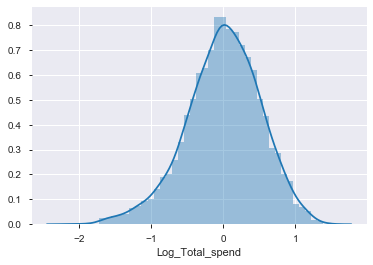

In [111]:
residuals=y_train-y_Predict_train

import seaborn as sns

sns.distplot(residuals)

#### From the above histogram , shows that the residuals are normally distributed, so our assumption is not violated

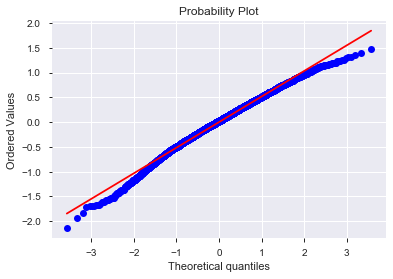

In [112]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot(residual_1, dist="norm", plot=pylab)
pylab.show()

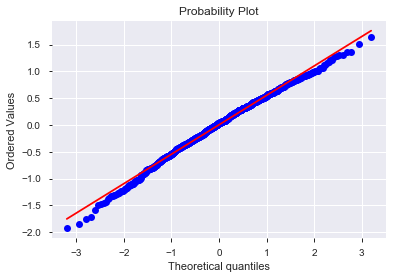

In [113]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot(residual, dist="norm", plot=pylab)
pylab.show()

#### <a>Decile analysis

In [114]:
## Predict the sales for decile analysis.

train['y_Predict_train']=y_Predict_train
test['y_Predict_test']=y_Predict_test

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
## Deciles distribution
train['Deciles'] = pd.qcut(y_Predict_train, 10, labels = False)
test['Deciles'] = pd.qcut(y_Predict_test, 10, labels = False)

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [116]:
train

,card2_2,card2_3,card2_4,card2_5,card_2,card_3,card_4,card_5,gender_1,lninc,reason_2,bfast_2,address_32,card2benefit_3,Log_Total_spend,pred_val,y_Predict_train,Deciles
4227,1,0,0,0,0,1,0,0,1,3.806662,0,0,0,0,6.132747,347.796326,5.851617,3
4676,0,0,1,0,0,1,0,0,0,3.637586,1,1,0,0,6.288286,399.767791,5.990884,5
800,0,0,0,0,0,0,1,0,1,4.382027,0,0,0,0,6.024198,571.507750,6.348278,8
3671,0,0,0,1,0,1,0,0,1,4.356709,0,1,0,0,5.141781,439.406217,6.085424,6
4193,0,0,1,0,0,1,0,0,1,2.833213,0,0,0,0,5.473572,239.623946,5.479071,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0,0,1,0,1,0,0,0,0,3.610918,0,0,0,0,5.661014,336.490502,5.818570,3
466,0,0,1,0,1,0,0,0,1,5.605839,0,1,0,1,6.256767,554.873517,6.318740,7
3092,0,0,1,0,0,1,0,0,1,3.465736,0,0,0,0,5.954178,295.986540,5.690314,2
3772,0,1,0,0,0,0,0,0,1,3.555348,0,1,0,0,6.254848,560.567935,6.328950,7


In [117]:
Predicted_avg = train.groupby(['Deciles'])['Deciles', 'y_Predict_train'].mean().sort_index(ascending = False)['y_Predict_train']
Actual_avg = train.groupby(['Deciles'])['Deciles', 'Log_Total_spend'].mean().sort_index(ascending = False)['Log_Total_spend']
Decile_analysis_train = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

Predicted_avg = test.groupby(['Deciles'])['Deciles', 'y_Predict_test'].mean().sort_index(ascending = False)['y_Predict_test']
Actual_avg = test.groupby(['Deciles'])['Deciles', 'Log_Total_spend'].mean().sort_index(ascending = False)['Log_Total_spend']
Decile_analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()

In [118]:
Decile_analysis_train

,Deciles,y_Predict_train,Log_Total_spend
0,9,6.720834,6.714171
1,8,6.422658,6.424948
2,7,6.262156,6.227744
3,6,6.129321,6.151026
4,5,6.013246,6.012701
5,4,5.908565,5.936951
6,3,5.811678,5.784294
7,2,5.718310,5.767240
8,1,5.617202,5.607986
9,0,5.429935,5.406936


In [119]:
Decile_analysis_test

,Deciles,y_Predict_test,Log_Total_spend
0,9,6.725530,6.704980
1,8,6.441082,6.408417
2,7,6.274815,6.257068
3,6,6.149833,6.198391
4,5,6.017044,6.056596
5,4,5.909561,5.859584
6,3,5.800358,5.795972
7,2,5.710974,5.736205
8,1,5.614791,5.686602
9,0,5.439527,5.408038


In [120]:
train['y_Predict_train']=np.exp(y_Predict_train)
train['y_Predict_train']

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4227    347.796326
4676    399.767791
800     571.507750
3671    439.406217
4193    239.623946
           ...    
4426    336.490502
466     554.873517
3092    295.986540
3772    560.567935
860     371.571675
Name: y_Predict_train, Length: 4000, dtype: float64

In [121]:
test['y_Predict_test']=np.exp(y_Predict_test)
test['y_Predict_test']

c:\users\ankit abhijeet\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1501    331.735747
2586    317.376564
2653    181.764858
1055    666.432994
705     388.205321
           ...    
4711    410.170864
2313    322.443129
3214    403.492461
2732    649.272412
1926    331.657977
Name: y_Predict_test, Length: 1000, dtype: float64

In [122]:
### Final Pred_spend-

In [123]:
testfile=pd.concat([Banking_New,np.exp(lm1.predict(Banking_New))],axis=1)

In [124]:
testfile.rename(columns = {0:'Pred_Spend'}, inplace = True) 

In [125]:
testfile

,region_2,region_3,region_4,region_5,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_3,...,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv,Total_spend,Log_Total_spend,Pred_Spend
0,0,0,0,0,1,0,0,0,1,0,...,29.50,126.10,14.25,60.0,0.00,0.00,13,149.46,5.007029,341.951487
1,0,0,0,1,0,0,0,1,0,0,...,54.85,1975.00,16.00,610.0,45.65,1683.55,18,77.54,4.350794,236.891582
2,0,1,0,0,0,0,1,0,1,0,...,0.00,0.00,23.00,1410.0,0.00,0.00,21,359.97,5.886021,377.170433
3,0,0,1,0,0,1,0,0,0,0,...,0.00,0.00,21.00,685.0,0.00,0.00,26,359.41,5.884464,290.892844
4,1,0,0,0,1,0,0,0,0,1,...,0.00,0.00,17.25,360.0,19.05,410.80,27,507.83,6.230147,399.895834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0,0,0,1,0,0,0,0,0,...,0.00,0.00,21.75,1565.0,0.00,0.00,19,1425.67,7.262397,1057.361038
4996,0,1,0,0,0,1,0,0,0,0,...,0.00,0.00,26.25,800.0,27.90,757.35,14,366.35,5.903589,504.117567
4997,0,0,1,0,0,0,0,1,0,0,...,0.00,0.00,15.25,1070.0,0.00,0.00,16,1527.75,7.331551,906.419668
4998,0,0,0,0,0,0,0,0,0,0,...,29.55,1032.85,9.50,345.0,0.00,0.00,24,752.95,6.623999,568.315701
